In [293]:
%pip install torch matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [294]:
with open("names.txt", "r") as file:
    contents = file.read()

names = contents.splitlines()

In [295]:
import torch

chars = "".join(["."] + sorted(set([c for name in names for c in name])))
c2i = {c: i for i, c in enumerate(chars)}
i2c = {i: c for i, c in enumerate(chars)}

M = torch.zeros(27, 27, dtype=torch.double)

In [296]:
for name in names:
    word = "." + name + "."
    for c_char, n_char in zip(word, word[1:]):
        M[c2i[c_char], c2i[n_char]] += 1

In [297]:
nval = 0.3

color = "#00aaff"
r = min(int(int(color[1:3], 16) + 255 * nval), 255)
g = min(int(int(color[3:5], 16) + 255 * nval), 255)
b = min(int(int(color[5:7], 16) + 255 * nval), 255)

r, g, b

(76, 246, 255)

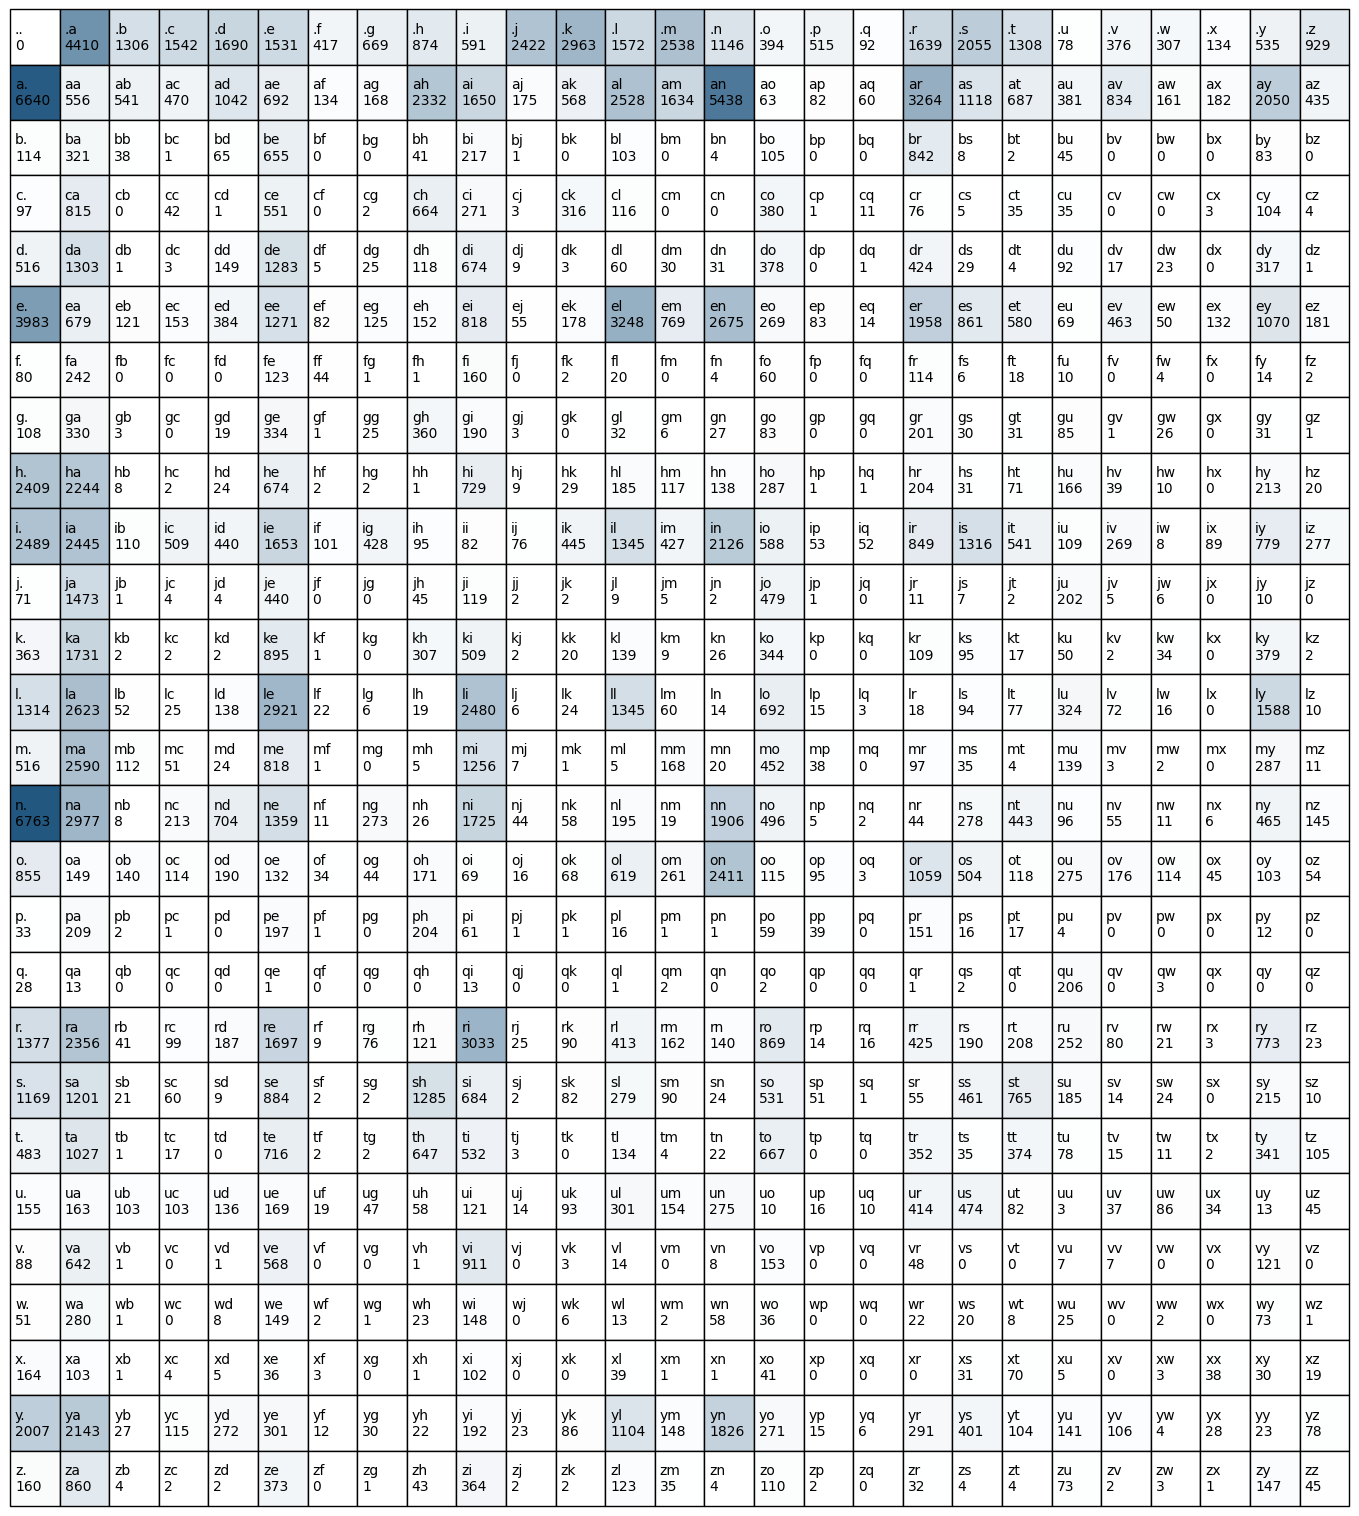

In [298]:
import matplotlib.pyplot as plt

def calculate_color(value, maxvalue):
    maxcolor = "#225780"
    nval = value / maxvalue
    r = 255 - int((255 - int(maxcolor[1:3], 16)) * nval)
    g = 255 - int((255 - int(maxcolor[3:5], 16)) * nval)
    b = 255 - int((255 - int(maxcolor[5:7], 16)) * nval)
    return f"#{''.join([hex(int(c))[2:].zfill(2) for c in [r, g, b]])}"

def print_matrix():
    maxitem = M.max().item()
    tdata = []
    cdata = []
    for i in range(M.shape[0]):
        tdata.append([])
        cdata.append([])
        for j in range(M.shape[1]):
            tdata[i].append(f"{i2c[i] + i2c[j]}\n{int(M[i][j].item())}")
            cdata[i].append(calculate_color(M[i][j].item(), maxitem))
    fig, ax = plt.subplots()
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')
    table = ax.table(cellText=tdata, loc="center", colWidths=[0.1] * 27, cellLoc="left", cellColours=cdata)

    for r in range(27):
        for c in range(27):
            table[(r, c)].set_height(0.15)

    plt.show()

print_matrix()

In [299]:
# smooth matrix
M += 1

# normilize rows
for i in range(M.shape[0]):
    M[i] /= M[i].sum()

In [300]:
nll = 0
n = 0
for name in names:
    full_word = "." + name + "."
    for c_char, n_char in zip(full_word, full_word[1:]):
        nll -= torch.log(M[c2i[c_char], c2i[n_char]])
        n += 1
av_nll = nll / n

print(f"dataset loss: {av_nll.item()}")

dataset loss: 2.454576820116076


In [301]:
# create a seed for the random number generator
seed = torch.manual_seed(241019)

samples = []

for _ in range(32000):
    name = "."
    while True:
        next_char = i2c[torch.multinomial(M[c2i[name[-1:]]], 1, generator=seed).item()]
        name += next_char
        if next_char == ".":
            break
    samples.append(name[1:-1])

In [302]:
nll = 0
n = 0
for name in samples:
    full_word = "." + name + "."
    for c_char, n_char in zip(full_word, full_word[1:]):
        nll -= torch.log(M[c2i[c_char], c2i[n_char]])
        n += 1
av_nll = nll / n

print(f"model loss: {av_nll.item()}")

model loss: 2.4616517527921826
